<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [60]:
# type your code here
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [21]:
# load the csv file
df_lifeExp=pd.read_csv('Life_Expectancy.csv')
df_lifeExp.head()
# type your code here

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [12]:
df_lifeExp.info() #4,8,9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<function matplotlib.pyplot.show(close=None, block=None)>

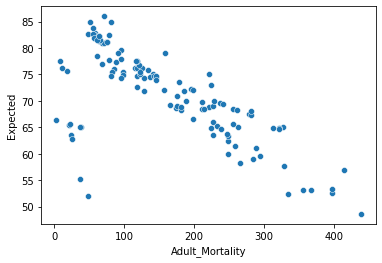

In [6]:
# type your code here
sns.scatterplot(df['Adult_Mortality'],df['Expected'])
plt.show

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
#Expected error value is required for the impact of human development index on life expectancy of nation
# selecting independent variables that describe immunization
X = df_lifeExp['Income_Index']

# 'sm.add_constant' adds the intercept to the model
# Addding constant because there is some value with zero,which should be not happen,So adding constant with value as 1
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp.Expected

# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,X).fit()

# capture predicted values
predictions = SLR_model.predict(X)

# find the residuals
residual = df_lifeExp.Expected - predictions

# calculate the sum of residuals
sum_resid = np.sum(residual)

# display the 13 digits after decimal
#"{:.13f}". format(): displays the 13 digits after decimal
output_residual = "{:.13f}". format(np.sum(residual))

# print sum of residuals
print("Sum of all residuals",output_residual)

# get the total number of rows
#len(): gives the count of the observations
sample_size = len(df_lifeExp.index)

# calculate expected value for residuals
expected_value = sum_resid/sample_size

# for suppressing the e symbol format of printing output
#"{:.13f}". format(): display
#Residual value -That our predicted value matching with the regression value

output = "{:.13f}". format(expected_value)

# print expected residual value
print("Expected residual value",output)



Sum of all residuals -0.0000000000018
Expected residual value -0.0000000000000


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[4,8,9]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           0.000468
Time:                        10:16:38   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[4,8,9]]

#Developed will be zero and Develping will one
# create n-1 dummy variables
# 'drop_first': creates (n-1) dummy variables using get_dummies()
# 'prefix': adds prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concate the dummy variable with features describing immunization using concat()
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_newmodel = sm.OLS(y,X).fit()

# print the model summary
print(MLR_newmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.00e-09
Time:                        10:31:32   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.77

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# we include all the numeric predictors
x=df_lifeExp.drop(columns='Expected')
X = df_lifeExp.iloc[:,2:16]

# create n-1 dummy variables using get_dummies()
# use 'drop_first' to create (n-1) dummy variables
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with other features 
# 'axis=1' concates the dataframes along columns 
X = pd.concat([X, encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y, X).fit()
# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get insignificant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

['const',
 'Adult_Mortality',
 'Hepatitis ',
 ' HIV',
 'Population',
 'Income_Index',
 'Status_Developing']

In [26]:
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     39.82
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           5.10e-37
Time:                        10:56:27   Log-Likelihood:                -324.00
No. Observations:                 124   AIC:                             680.0
Df Residuals:                     108   BIC:                             725.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.3372      3.544     17.306      0.000      54.312      68.363
Adult_Mortality       -0.0230      0.004     -5.670      0.000      -0.031      -0.015
Infant_Deaths          0.0571      0.037      1.550      0.124      -0.016       0.130
Hepatitis              0.0691      0.032      2.179      0.031       0.006       0.132
Measles            -5.634e-05   6.09e-05     -0.926      0.357      -0.000    6.43e-05
 BMI                  -0.0241      0.022     -1.073      0.286      -0.069       0.020
Underfive_Deaths      -0.0404      0.027     -1.494      0.138      -0.094       0.013
Polio                 -0.0101      0.022     -0.459      0.647      -0.053       0.033
Diphtheria            -0.0331      0.040     -0.833      0.407      -0.112       0.046
 HIV                  -1.0481      0.268     -3.917      0.000      -1.578      -0.518
GDP                 5.253e-05   3.47e-05      1.514      0.133   -1.62e-05       0.000
Population         -1.931e-08   8.56e-09     -2.256      0.026   -3.63e-08   -2.34e-09
Malnourished10_19     -0.4381      0.297     -1.476      0.143      -1.027       0.150
Malnourished5_9        0.2444      0.278      0.878      0.382      -0.308       0.796
Income_Index          23.4857      4.273      5.496      0.000      15.016      31.956
Status_Developing     -2.3978      1.116     -2.149      0.034      -4.609      -0.187
==============================================================================
Omnibus:                        7.747   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               13.151
Skew:                           0.191   Prob(JB):                      0.00139
Kurtosis:                       4.549   Cond. No.                     7.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
# selecting independent variables that represent the economic indices of GDP and HDI(Income)
X = df_lifeExp.iloc[:,[11,15]]

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']
 
# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# capture predicted values
predicted = MLR_model.predict(X)

# calculate the SSR on train dataset
ssr = np.sum((predicted - y.mean())**2)

# print the SSR value
print("SSR:",ssr)

# calculate the SSE on train dataset
sse = np.sum((y - predicted)**2)

# print the SSE value
print("SSE:",sse)

# calculate the SST on train dataset
# print the SST value
print("SST:",(sse+ssr))

SSR: 6292.571603999805
SSE: 2527.2338798711353
SST: 8819.80548387094


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
# selecting independent variables that describes HDI
X = df_lifeExp.iloc[:,[15]]

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,X).fit()

# CI for β coefficient
print(SLR_model.conf_int())

                     0          1
Income_Index 97.009477 102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
#Adult_mortality,underfive_death,Infant_death
#Life expectancy
#population

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
#H0=Data follows Normal distribution
#H1=Data follows not Nosrmal distribution
# we include all the numeric predictors
X = df_lifeExp.iloc[:,2:16]

# use 'drop_first' to create (n-1) dummy variables using get_dummies()
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with features describing immunization 
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# 'sm.add_constant' adds the intercept to the model
X =  sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_full = sm.OLS(y,X).fit()
MLR_model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     39.82
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           5.10e-37
Time:                        11:20:33   Log-Likelihood:                -324.00
No. Observations:                 124   AIC:                             680.0
Df Residuals:                     108   BIC:                             725.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.3372      3.544     17.306      0.000      54.312      68.363
Adult_Mortality       -0.0230      0.004     -5.670      0.000      -0.031      -0.015
Infant_Deaths          0.0571      0.037      1.550      0.124      -0.016       0.130
Hepatitis              0.0691      0.032      2.179      0.031       0.006       0.132
Measles            -5.634e-05   6.09e-05     -0.926      0.357      -0.000    6.43e-05
 BMI                  -0.0241      0.022     -1.073      0.286      -0.069       0.020
Underfive_Deaths      -0.0404      0.027     -1.494      0.138      -0.094       0.013
Polio                 -0.0101      0.022     -0.459      0.647      -0.053       0.033
Diphtheria            -0.0331      0.040     -0.833      0.407      -0.112       0.046
 HIV                  -1.0481      0.268     -3.917      0.000      -1.578      -0.518
GDP                 5.253e-05   3.47e-05      1.514      0.133   -1.62e-05       0.000
Population         -1.931e-08   8.56e-09     -2.256      0.026   -3.63e-08   -2.34e-09
Malnourished10_19     -0.4381      0.297     -1.476      0.143      -1.027       0.150
Malnourished5_9        0.2444      0.278      0.878      0.382      -0.308       0.796
Income_Index          23.4857      4.273      5.496      0.000      15.016      31.956
Status_Developing     -2.3978      1.116     -2.149      0.034      -4.609      -0.187
==============================================================================
Omnibus:                        7.747   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               13.151
Skew:                           0.191   Prob(JB):                      0.00139
Kurtosis:                       4.549   Cond. No.                     7.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
stat, p_value = shapiro(MLR_model_full.resid)

#If data is normal distribution then residual should not be normal distribution

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#P-val should less than 0.05 then residual is Normal Distribution

Test statistic: 0.9734908938407898
P-Value: 0.015233161859214306


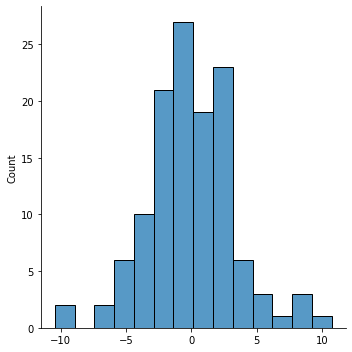

In [35]:
sns.displot(MLR_model_full.resid)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
#Here we were not adding constant to x variable
# type your code here
# we include all the numeric predictors
X = df_lifeExp.iloc[:,2:17]

# use 'drop_first' to create (n-1) dummy variables using get_dummies()
# use 'prefix' to add prefix to category of dummy variable
encoded_status = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True, prefix = 'Status')

# concat the dummy variable with features describing immunization 
# create a dataframe of all relevant independent variables
# 'axis=1' concates the dataframes along columns 
X = pd.concat([pd.DataFrame(X), encoded_status], axis=1)

# set the dependent variable
y = df_lifeExp['Expected']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model_full_no_intercept = sm.OLS(y,X).fit()

# print the model sumary
print(MLR_model_full_no_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sun, 28 Mar 2021   Prob (F-statistic):                   4.84e-108
Time:                        11:24:31   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [41]:
# load the csv file
df_FEV=pd.read_csv('FEV_data.csv')
df_FEV.head()
# type your code here

,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.000000,F,smoker,1.708000
1,17,167.500000,F,smoker,1.724000
2,19,154.500000,F,smoker,1.720000
3,16,163.000000,M,smoker,1.558000
4,16,157.000000,M,smoker,1.895000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

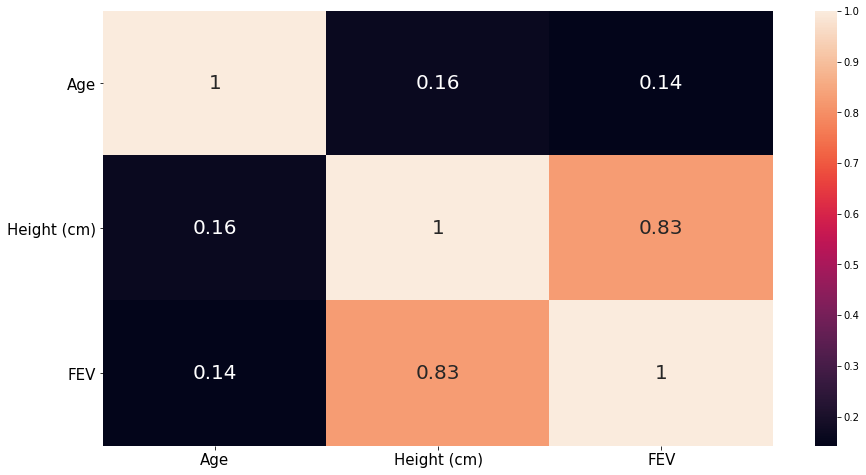

In [42]:
# type your code here
# set dimensions for the plot figure
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_FEV_num = df_FEV[["Age","Height (cm)", "FEV"]]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_FEV_num.corr(), annot = True, annot_kws = {"size": 20})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

#Height is strongly coefficient than age and FEV

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here
# consider the independent variables
X = df_FEV["Smoke_habit"]

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# consider the dependent variable
y = df_FEV["FEV"]

# fit a model with an intercept using fit()
# add_constant(): adds the intercept term to the model
LM_model = sm.OLS(y, sm.add_constant(X)).fit()

# print the summary output
print(LM_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.36e-16
Time:                        12:03:35   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4206      0.098     34.729      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
# consider the independent variables
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
df_FEV_cat = df_FEV.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or colum
X = pd.concat([df_FEV_num, dummy_variables],axis=1)

# consider the dependent variable
y = df_FEV["FEV"]

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y, sm.add_constant(X)).fit()

# print the summary output
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sun, 28 Mar 2021   Prob (F-statistic):          2.78e-168
Time:                        12:14:04   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0

#Othere ways for finding multiple co relation
1.Variation implement factor
2.Corelation plot

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

H0=Error terms are not auto corelated
H1=Error terms are auto corelated
Durbin-Watson: 1.647 (From the model summary)

In [46]:
#Another way for interpretation
# consider the independent variables
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
df_FEV_cat = df_FEV.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or column
X = pd.concat([df_FEV_num, dummy_variables],axis=1)

# consider the dependent variable
y = df_FEV["FEV"]

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y, sm.add_constant(X)).fit()

# compute residuals using 'resid'
residuals = MLR_model.resid

# perform Durbin-Watson test 
durbin_watson(residuals)

1.6472983005218602

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here


<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
# consider the independent variables
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)

# consider all the categorical variables in the data
# select_dtypes: selects the desired the variable having specified datatype
# include: includes the variables with specified datatype
df_FEV_cat = df_FEV.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicated one-hot encoding
dummy_variables = pd.get_dummies(df_FEV_cat, drop_first=True)

# concatenate the numerical and dummy variables
# axis: specifies whether to drop labels from index or column
X = pd.concat([df_FEV_num, dummy_variables],axis=1)

# add_constant(): adds the intercept term to the model
X = sm.add_constant(X)

# consider the dependent variable
y = df_FEV["FEV"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

# fit a full model using fit()
MLR_model = sm.OLS(y, X).fit()

# predict the y values
y_pred = MLR_model.predict(X_test)

# calculating the MSE for the test data and then rounding the value upto 4 digits
mse_test = round(mean_squared_error(y_test, y_pred),4)

# printing the mse for the test set
print("Mean Squared Error (MSE): ", mse_test)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# printing the rmse for the test set
print("Root Mean Squared Error (RMSE): ", rmse_test)

Mean Squared Error (MSE):  0.2403
Root Mean Squared Error (RMSE):  0.4902


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
# a user defined function to calculate MAPE 
# the function take arguments: actual and predicted values
# it returns the MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100
# consider the full model in Q18
# calculating the MAE for the test data and then rounding the value upto 4 digits

# consider the full model in Q18
# calculating the MAE for the test data and then rounding the value upto 4 digits
mae_test = round(mean_absolute_error(y_test, y_pred),4)

# printing the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

# Calculating the MAPE using the "mape()" function created above

# calculating the MAPE for the  data and then rounding the value upto 4 digits
mape_test = round(mape(y_test, y_pred),4)

# printing the mape for the tra set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

SyntaxError: invalid syntax (<ipython-input-63-d324b95a310f>, line 12)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here